# **DATA SCIENCE AND BUSINESS ANALYTICS INTERN at SPARKS FOUNDATION** #GRIPJAN21
### Author: Harshpreet Kaur


##  TASK 4: Exploratory Data Analysis - Terrorism

### Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

##### 1. As a security/defense analyst, try to find out the hot zone of terrorism.
##### 2. What all security issues and insights you can derive by EDA?

##### Dataset : https://drive.google.com/file/d/1luTU7xBvI7QAGPbQMxEHcgKUi9d6UeP_/view?usp=sharing

### Importing the Header Files 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### Get the data

In [2]:
dataset = pd.read_csv('C:\\Users\\harsh\\OneDrive\\Desktop\\Sparks Foundation\\Datasets\\GlobalTerrorism.csv',encoding='ISO-8859-1')
print("Data imported successfully")

C:\Users\harsh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Data imported successfully


In [3]:
#printing head( first few rows) of the dataset 
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
# renaming columns for easy understanding
dataset.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'},inplace=True)
dataset.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
# deleting the unnecessary columns
dataset= dataset[['Year','Month','Extended','Day','Country','State','Region','City','Latitude','Longitude',
                 'AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
dataset.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [6]:
#the total no of rows and columns
dataset.shape

(181691, 19)

In [7]:
#checking for any null values
dataset.isnull().sum()

Year                0
Month               0
Extended            0
Day                 0
Country             0
State             421
Region              0
City              434
Latitude         4556
Longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

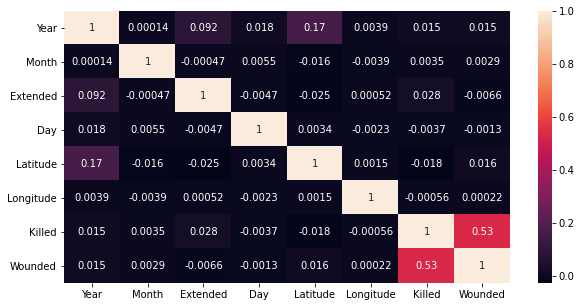

In [8]:
import seaborn as sns
# finding the pairwise correlations between the columns and visualising using heatmaps
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

### Top 10 Countries with most Terrorist Attacks.

In [9]:
print("Country with the most attacks:\n",dataset['Country'].value_counts().head(10))

Country with the most attacks:
 Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64


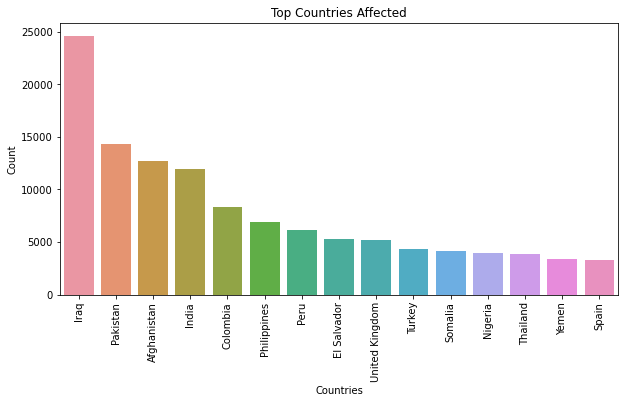

In [10]:
plt.figure(figsize = (10,5))
sns.barplot(dataset['Country'].value_counts()[:15].index,dataset['Country'].value_counts()[:15].values)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

#### Therefore, the country with most attacks is Iraq.

### States with most Terrorist Attack

In [11]:
print('State with the most attacks:\n',dataset['State'].value_counts())

State with the most attacks:
 Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
                      ... 
Astrakhan (Oblast)       1
Nakhon Sawan             1
Tver                     1
Caazapa                  1
Lipkovo (Region)         1
Name: State, Length: 2855, dtype: int64


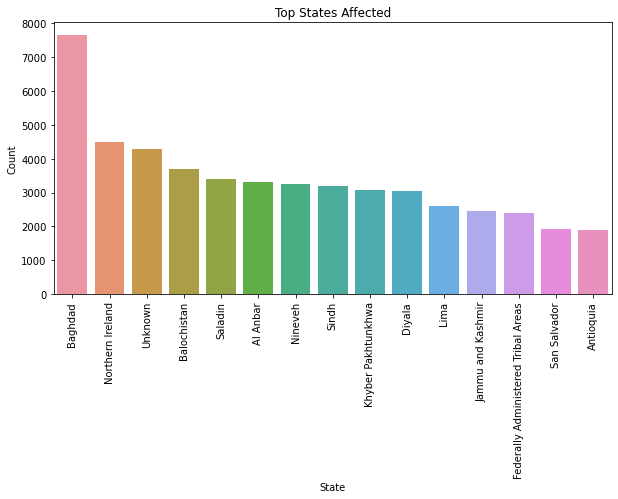

In [12]:
plt.figure(figsize = (10,5))
sns.barplot(dataset['State'].value_counts()[:15].index,dataset['State'].value_counts()[:15].values)
plt.title('Top States Affected')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

#### Most affected state is Baghdad

### Regions with most Terrorist Attacks

In [13]:
print("Region with the most attacks: \n",dataset['Region'].value_counts())

Region with the most attacks: 
 Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64


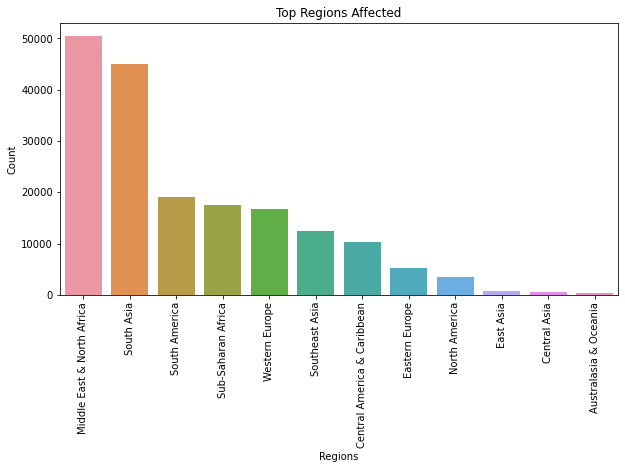

In [14]:
plt.figure(figsize = (10,5))
sns.barplot(dataset['Region'].value_counts()[:15].index,dataset['Region'].value_counts()[:15].values)
plt.title('Top Regions Affected')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

#### Therefore, the most affected region is  Middle East & North Africa. 

### Cities with most Terrorist Attacks

In [15]:
print("Cities with the most attacks: \n",dataset['City'].value_counts())

Cities with the most attacks: 
 Unknown        9775
Baghdad        7589
Karachi        2652
Lima           2359
Mosul          2265
               ... 
Sentyanivka       1
Kafruk            1
Misma             1
Macachin          1
Alue Kawee        1
Name: City, Length: 36674, dtype: int64


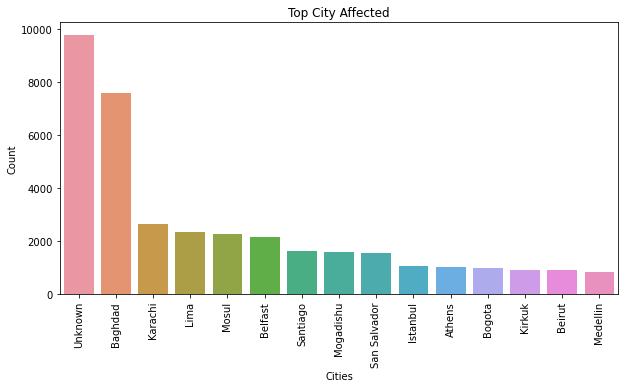

In [16]:
plt.figure(figsize = (10,5))
sns.barplot(dataset['City'].value_counts()[:15].index,dataset['City'].value_counts()[:15].values)
plt.title('Top City Affected')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

#### City with most attacks is baghdad since the first is unknown

### Years with most Terrorist Activity

In [17]:
print("Year with the most attacks:\n",dataset['Year'].value_counts().head(10))

Year with the most attacks:
 2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64


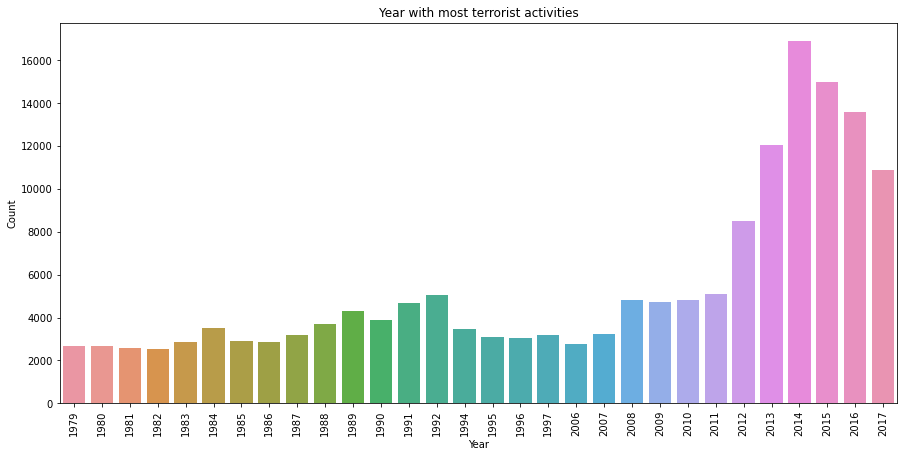

In [18]:
plt.figure(figsize = (15,7))
sns.barplot(dataset['Year'].value_counts()[:30].index,dataset['Year'].value_counts()[:30].values)
plt.title('Year with most terrorist activities')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

#### Year with the most attacks is 2014

### Most Frequent Attack Type

In [19]:
print("Most Frequent Attack Types:\n",dataset['AttackType'].value_counts())

Most Frequent Attack Types:
 Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64


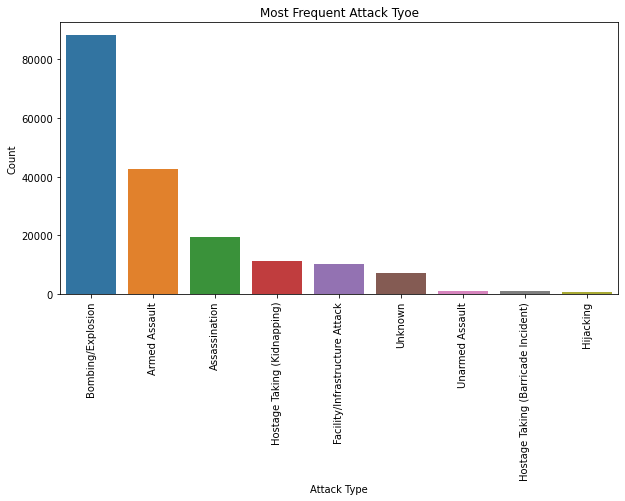

In [20]:
plt.figure(figsize = (10,5))
sns.barplot(dataset['AttackType'].value_counts()[:15].index,dataset['AttackType'].value_counts()[:15].values)
plt.title('Most Frequent Attack Tyoe')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

#### Most frequent Attack Type is Bombing / Explosion.

### Most Frequent Groups invovled in past terrorist activity

In [21]:
print("Group with the most attacks:\n",dataset['Group'].value_counts().head())

Group with the most attacks:
 Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: Group, dtype: int64


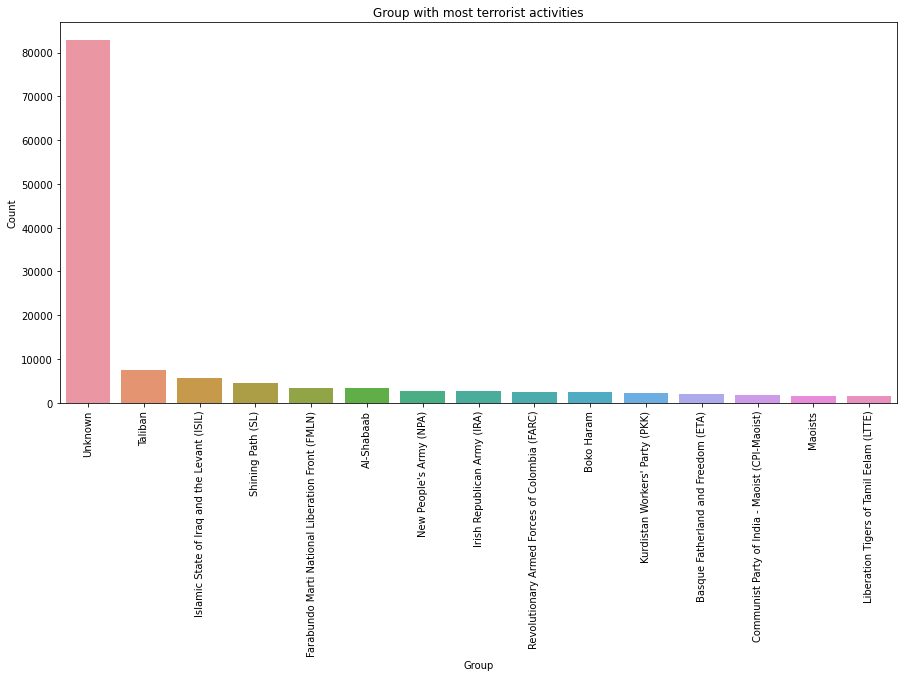

In [22]:
plt.figure(figsize = (15,7))
sns.barplot(dataset['Group'].value_counts()[:15].index,dataset['Group'].value_counts()[:15].values)
plt.title('Group with most terrorist activities')
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

#### The most frequent group in past terror attacks is taliban since the first is unknown

In [23]:
print("Most popular Weapon Type :\n",dataset['Weapon_type'].value_counts().head())

Most popular Weapon Type :
 Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Melee          3655
Name: Weapon_type, dtype: int64


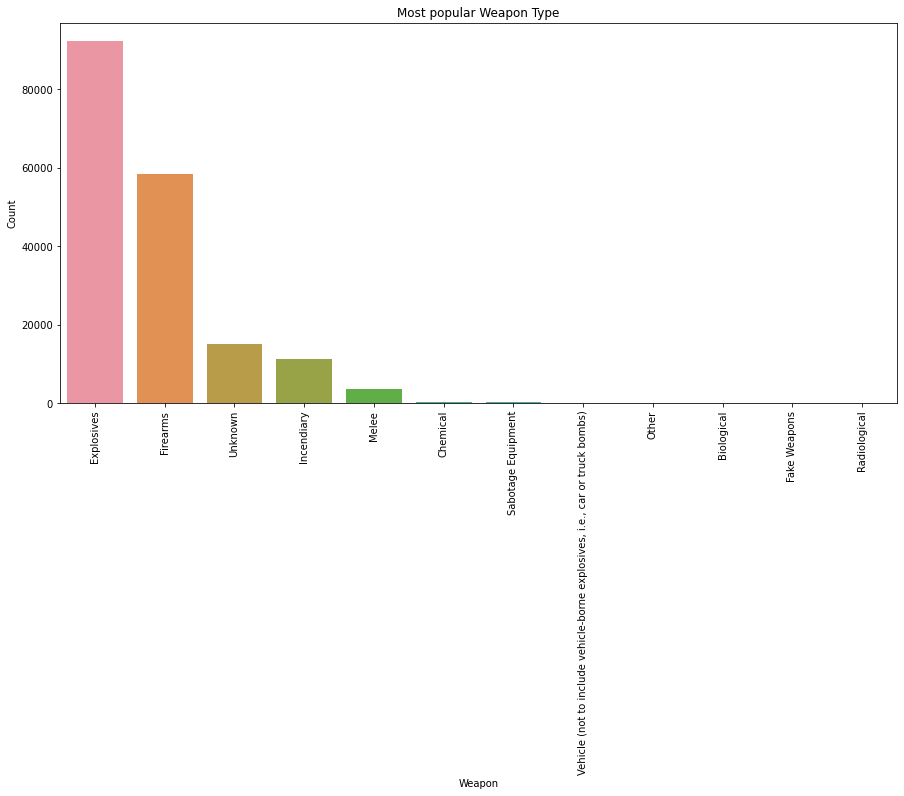

In [24]:
plt.figure(figsize = (15,7))
sns.barplot(dataset['Weapon_type'].value_counts()[:15].index,dataset['Weapon_type'].value_counts()[:15].values)
plt.title('Most popular Weapon Type')
plt.xlabel('Weapon')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

#### Most popular weapon type is explosives.

### Killed vs Wounded Visualization

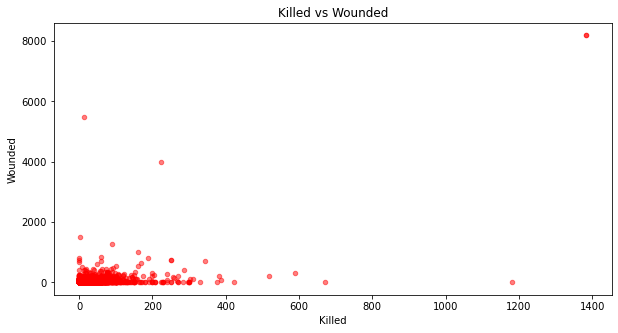

In [25]:
dataset.plot(kind = 'scatter', x = 'Killed', y = 'Wounded', alpha = 0.5, color = 'red', figsize = (10,5))
plt.xlabel('Killed')
plt.ylabel('Wounded')
plt.title('Killed vs Wounded')
plt.show()

## Conclusion:

### Hot zones

#### 1. Most affected countries are Iraq, Pakistan and Afganistan.
#### 2. Most affected state is Baghdad
#### 3. Most affected region is Middle East and North Africa
#### 4. Most affected year in the past is 2014

### Insights drawn

#### 1. The most frequent attack type is Bombing/Explosion so people need to practice a little alertness in crowded places.
#### 2. The most popular weapon is explosives.
